In [2]:
pip install finance-datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
import re
import time
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from bs4 import BeautifulSoup
from tqdm import tqdm
from datetime import datetime

In [ ]:
conda install -n base ipykernel --update-deps --force-reinstall

In [2]:
#함수화
def get_info_from_url(url):
    response = requests.get(
        url,
        headers={
        'User-Agent': 'Mozilla 5.0'
        }
    )
    bs = BeautifulSoup(response.text, 'lxml') 
    return bs

In [37]:
def get_lastpage_num(url):
    url = f'http://www.fantastock.co.kr/bbs/board.php?bo_table=free_list{i}&page=1'
    bs = get_info_from_url(url)  
    page = bs.select('.color-gray')[0].text.strip()
    page_num = math.ceil(int(re.findall('\d+',page)[0])/15)
    return page_num

In [39]:
#모든 년도 모든 페이지에 날짜 url 얻기
#마지막 페이지 찾는 작업 필요 
df = pd.DataFrame()
for year in tqdm(range(19,24)):
    url = f'http://www.fantastock.co.kr/bbs/board.php?bo_table=free_list{year}&page=1'
    last_page_num = get_lastpage_num(url)
    for page_num in tqdm(range(last_page_num + 1)):
        url = f'http://www.fantastock.co.kr/bbs/board.php?bo_table=free_list{year}&page={page_num}'
        bs = get_info_from_url(url)  
        info_from_bs = bs.select('table>tr')
        for bs in info_from_bs:
            try :
                date = bs.select('dd')[1].text
                url_link = bs.select('a')[0].get('href')
                bs = get_info_from_url(url_link)
                data_from_url = bs.select('.cmt_contents')

                for comments in data_from_url:
                    comment = comments.text

                    temp = pd.DataFrame({
                        'date': date,
                        'url': url_link,
                        'comment': comment
                        }, index=[0])

                    df = pd.concat([df, temp], axis=0)
            except IndexError:
                print(1)

100%|██████████| 5/5 [04:05<00:00, 49.02s/it]

1
1


In [40]:
df

,date,url,comment
0,2019.12.30,http://www.fantastock.co.kr/bbs/board.php?bo_t...,\n\n오늘 무료추천종목은 제가 올해의 증권경영인 시상식에 참여를 해야되어서 하루...
0,2019.12.30,http://www.fantastock.co.kr/bbs/board.php?bo_t...,\n\n내일은 12월31일이라 주식시장이 열리지않고 1월1일은 신정연휴라 쉬고 1월...
0,2019.12.30,http://www.fantastock.co.kr/bbs/board.php?bo_t...,\n\n회사 업무는 정상진행됩니다. \n
0,2019.12.30,http://www.fantastock.co.kr/bbs/board.php?bo_t...,\n\n※ AP투자연구소 김용재 소장 V.I.P 리딩 특징 ※ 1.무료추천주와는...
0,2019.12.30,http://www.fantastock.co.kr/bbs/board.php?bo_t...,\n\n \n
...,...,...,...
0,2022.12.19,http://www.fantastock.co.kr/bbs/board.php?bo_t...,\n\n\n
0,2022.12.19,http://www.fantastock.co.kr/bbs/board.php?bo_t...,\n\n\n
0,2022.12.19,http://www.fantastock.co.kr/bbs/board.php?bo_t...,\n\n \n
0,2022.12.19,http://www.fantastock.co.kr/bbs/board.php?bo_t...,"\n\n코스피 하락, 코스닥 하락거래소 : 개인 매도 / 외국인 매도 / 기관 매수..."


In [41]:
#파일로 저장
df.to_csv('data.csv', index=False, encoding='utf-8-sig')


In [2]:
#파일 불러오기
df = pd.read_csv('./data.csv')

In [4]:
#금일 추천주 필터링
df = df[df['comment'].str.contains('매수', na =False)]
df = df[df['comment'].str.contains('현재시간', na =False)]
df = df[df['comment'].str.contains('▶', na =False)]
df['comment'] = df.comment.apply(lambda x : re.sub('\\n','',x))

In [6]:
df

,date,url,comment
0,2019-12-27,http://www.fantastock.co.kr/bbs/board.php?bo_t...,▶ 현재시간 9시 00분 에스맥 현재가 1105원 기준 매수!!
1,2019-12-27,http://www.fantastock.co.kr/bbs/board.php?bo_t...,▶ 현재시간 9시 01분 화천기계 현재가 3180원 기준 매수!!
2,2019-12-27,http://www.fantastock.co.kr/bbs/board.php?bo_t...,▶ 현재시간 9시 02분 루미마이크로 현재가 1970원 기준 매수!!
3,2019-12-26,http://www.fantastock.co.kr/bbs/board.php?bo_t...,▶ 현재시간 9시 00분 한국화장품 현재가 11400원 기준 매수!!
4,2019-12-26,http://www.fantastock.co.kr/bbs/board.php?bo_t...,▶ 현재시간 9시 01분 디앤씨미디어 현재가 16500원 기준 매수!!
...,...,...,...
1332,2022-12-22,http://www.fantastock.co.kr/bbs/board.php?bo_t...,▶ 현재시간 9시 3분 팬오션 현재가 6050원 기준 매수!!
1333,2022-12-21,http://www.fantastock.co.kr/bbs/board.php?bo_t...,▶ 현재시간 9시 6분 세종메디칼 현재가 3450원 기준 매수!!
1334,2022-12-21,http://www.fantastock.co.kr/bbs/board.php?bo_t...,▶ 현재시간 9시 7분 청담글로벌 현재가 11350원 기준 매수!!
1335,2022-12-19,http://www.fantastock.co.kr/bbs/board.php?bo_t...,▶ 현재시간 9시 0분 노터스 현재가 6250원 기준 매수!!


In [7]:
# 예외찾기
df['comment'] = df.comment.apply(lambda x : x.replace('\xa0',' '))
#종목 슬라이스
df['slicing_comment'] = df.comment.apply(lambda x : re.findall('\d+분 ([가-힣A-z]+)',x)[0])
#종목명 추출
recommended_stock = df.filter(items=['date','slicing_comment'])
recommended_stock = recommended_stock.rename(columns={'slicing_comment':'stock_name'})

In [10]:
#대소변환
recommended_stock['stock_name'] = recommended_stock.stock_name.str.upper()

In [11]:
#주가 기본정보 불러오기
Kospi_df = pd.read_csv('./kospi_code.csv')
Kosdaq_df = pd.read_csv('./kosdaq_code.csv')

In [12]:
kospi = Kospi_df.filter(items= ['단축코드','한글명'])
kospi['class'] = 'kospi'

In [13]:
kosdaq = Kosdaq_df.filter(items= ['단축코드','한글종목명'])
kosdaq['class'] = 'kospi'

In [14]:
#주가 종목코드 불러오기
kospi = kospi.rename(columns={'단축코드':'stock_code','한글명' : 'stock_name'})
kosdaq = kosdaq.rename(columns={'단축코드':'stock_code','한글종목명' : 'stock_name'})
kospi_kosdaq = pd.concat([kospi,kosdaq])

In [15]:
#종목 코드 합치기 1트
stock = pd.merge(recommended_stock, kospi_kosdaq, how = 'left', on  = 'stock_name')

In [16]:
#누락된NaN 버리기
stock1 = stock.dropna()

In [89]:
#누락된 종목코드 찾기
# exception = stock[stock.stock_code.isnull()]
exception = stock.drop(stock1.index,axis=0)

In [90]:
#파일로 저장
#exception.to_csv('exception2.csv', index=False, encoding='utf-8-sig')

In [17]:
#파일불러오기
exception = pd.read_csv('./exception2.csv')

In [18]:
exception = exception.dropna()
exception['stock_code'] = exception.stock_code.apply(lambda x : str(int(x)).zfill(6))

In [22]:
exception_kospi_kosdaq=kospi_kosdaq.drop(columns=['stock_name'])
exception = pd.merge(exception,exception_kospi_kosdaq,how = 'left', on  = 'stock_code'  )

In [23]:
#최종 stock 가져오기 stock = stock1+exception
stock = pd.concat([stock1,exception])
stock = stock.sort_values(by=['date'], ascending=[True])
stock = stock.reset_index(drop= True)

In [25]:
#파일로 저장
stock.to_csv('recommend_stock2.csv', index=False, encoding='utf-8-sig')
#파일 불러오기
stock = pd.read_csv('./recommend_stock2.csv')

In [27]:
stock['date'] = stock.date.apply(lambda x : re.sub("-","",x))
stock['date']= stock['date'].astype('str')
stock['date'] = stock.date.apply(lambda x : datetime.strptime(x,'%Y%m%d'))

In [30]:
#date 타입 날짜 문자로 바꾸기
stock['end_date']= stock['date'].astype('str')
stock['end_date'] = stock.end_date.apply(lambda x : re.sub("-","",x))

In [31]:
#한국투자 API 보안 인증키 발급 
APP_KEY = "PSDbkNNrIX3j60cW2MEFnBGZDZ1BzpgDxvC0"
APP_SECRET = "QfaZRX24K15ojO4yjG5o5dM+SUvJT4PYiK+tKKzgikyhmfrnTXoxOwn9rCf2hzXdtOhh4v3/O4bSFfQgS+u6ojdb6KgWuyub4GRraoWYaJTJyHSRqWUPab2GiCvrI/aIjx5S925MohrETq0k/eopFHgMInG0lmZdAh5TaegaZ1NDpNvPW8Y="
URL_BASE = "https://openapi.koreainvestment.com:9443"
PATH = "oauth2/tokenP"
URL = f"{URL_BASE}/{PATH}"

headers = {"content-type":"application/json"}
body = {"grant_type":"client_credentials",
        "appkey":APP_KEY, 
        "appsecret":APP_SECRET}

res = requests.post(URL, headers=headers, data=json.dumps(body))
ACCESS_TOKEN = res.json()["access_token"]

In [32]:
#일자별 시세 가져오기 (함수)
def get_info_from_kisapi(stock_code,end_date):
    time.sleep(0.1)
    
    st_date = pd.date_range(end = end_date,periods=20)[0]
    st_date = st_date.strftime("%Y%m%d")
    
    URL = 'https://openapi.koreainvestment.com:9443/uapi/domestic-stock/v1/quotations/inquire-daily-itemchartprice'

    headers = {"Content-Type":"application/json", 
            "authorization": f"Bearer {ACCESS_TOKEN}",
            "appKey":APP_KEY,
            "appSecret":APP_SECRET,
            "tr_id":"FHKST03010100"
            }

    params = {
        "FID_COND_MRKT_DIV_CODE":"J",
        "FID_INPUT_ISCD":stock_code,
        "FID_INPUT_DATE_1" : st_date,
        "FID_INPUT_DATE_2" : end_date,
        "FID_PERIOD_DIV_CODE" : "D",
        "FID_ORG_ADJ_PRC" : "1"
    }

    res = requests.get(URL, headers=headers, params=params)   
    res = res.json().get('output2')[0:11]
    res.reverse()
    return res

In [33]:
#종목 일자별 데이터 가져오기 (함수)
def get_info_from_stock(res):
    temp = pd.DataFrame()
    day = 10
    for i in res:

        data = pd.DataFrame({
            'stck_oprc' :  i.get('stck_oprc'),
            'stck_clpr' : i.get('stck_clpr'),
            'stck_hgpr' : i.get('stck_hgpr'),
            'stck_lwpr' : i.get('stck_lwpr'),
            'acml_vol'  : i.get('acml_vol')},
            index=[f'D{day}']
        )
        temp = pd.concat([temp,data])
        day -=1
    temp= temp.transpose()
    
    br_pr = temp.iloc[1:2,9:10].reset_index(drop = True)
    br_pr.columns = 'br_pr_'+ br_pr.columns
    #당일시가
    tr_pr = temp.iloc[0:1,10:].reset_index(drop = True)    
    tr_pr.columns = 'tr_pr_'+ tr_pr.columns
    #당일고가
    tr_hpr = temp.iloc[2:3,10:].reset_index(drop = True)
    tr_hpr.columns = 'tr_hpr_'+ tr_hpr.columns
    #거래량(10일)
    br_vol = temp.iloc[4:5,0:10].reset_index(drop = True)
    br_vol.columns = 'Volume_'+ br_vol.columns
    #당일거래량
    tr_vol = temp.iloc[4:5,10:].reset_index(drop = True)
    tr_vol.columns = 'tr_vol_'+ tr_vol.columns
    #저점(10일)
    br_lpr = temp.iloc[3:4,0:10].reset_index(drop = True)
    br_lpr.columns = 'lpr_'+ br_lpr.columns
    #데이터 합치기 
    data = pd.concat([br_pr,tr_pr,tr_hpr,br_vol,tr_vol,br_lpr], axis=1)
    # #인덱스 삽입
    # date_data = pd.DataFrame({'date' : end_date,
    #                         'stock_code' : stock_code}
    #                         ,index=[0])
    # data = pd.concat([date_data,data], axis =1 )
    
    return data   

In [34]:
#전종목 가져오기
data = pd.DataFrame()
for i in range(len(stock)):
    end_date = stock.end_date[i]
    stock_code = stock.stock_code[i]
    res = get_info_from_kisapi(stock_code,end_date)
    temp = get_info_from_stock(res)
    data = pd.concat([data,temp],axis=0)
# data = data.drop(columns=['date','stock_code'])
# data = data.reset_index().drop(columns = 'index')

In [35]:
data = data.reset_index().drop(columns=['index'])

In [36]:
stock = pd.concat([stock, data], axis=1)

In [37]:
stock = stock.fillna(0)
for cn in stock.columns[4:]:
    stock[f'{cn}'] = stock[f'{cn}'].apply(lambda x : int(x))

In [38]:
#전일 종가 대비 당일 시가 증가율
stock['gap_change'] = stock.iloc[:,5:7].pct_change(axis =1).dropna(axis=1)

#전일(10일) 거래량 대비 당일 거래량 증가율 
stock['mean_vlome'] = stock.iloc[:,7:17].mean(axis =1)
stock['today_vlome'] = stock['tr_vol_D0']
stock['vlome_change'] = stock.iloc[:,30:].pct_change(axis=1)['today_vlome']

#저가 회귀식 기울기 구하기 
parameter = stock.iloc[:,19:29]
parameter = parameter.T
for i in range(len(parameter.columns)):
    name = f'price{i}' 
    parameter = parameter.rename(columns={i:name})

parameter = parameter.reset_index().drop(columns=['index'])
parameter = parameter.reset_index()

data2=pd.DataFrame()
for i in range(0,1280):
    model = sm.OLS.from_formula(f'index ~ price{i}', parameter).fit()
    slope = model.params[f'price{i}']
    temp = pd.DataFrame({'slope': slope} ,index =[i])
    data2 = pd.concat([data2,temp])

stock['slope'] = data2

#당일 고가 대비 시가 차이
stock['day_change'] = stock['tr_hpr_D0'] - stock['tr_pr_D0']
#당일 고가대비 시가 차이 (상승1 하락0)
stock['deter_change'] = stock.day_change.apply(lambda x : 1 if x > 0 else 0)

In [96]:
# stock = stock.drop_duplicates(subset=['date','stock_name'])

In [42]:
stock

,date,stock_name,stock_code,class,end_date,br_pr_D1,tr_pr_D0,tr_hpr_D0,Volume_D10,Volume_D9,...,lpr_D3,lpr_D2,lpr_D1,gap_change,mean_vlome,today_vlome,vlome_change,slope,day_change,deter_change
0,2019-10-29,알리코제약,260660,kospi,20191029,12200,13400,15000,297063,4456192,...,12050,11750,11600,0.098361,759403.4,5115955,5.736808,-0.000826,1600,1
1,2019-10-29,KPX생명과학,114450,kospi,20191029,6880,7380,8940,38177,71671,...,4735,4925,6250,0.072674,2549913.9,7226351,1.833959,0.003547,1560,1
2,2019-10-29,제일바이오,052670,kospi,20191029,4825,5590,6260,2339859,10716840,...,4540,4425,4510,0.158549,2428170.9,25005590,9.298118,-0.010179,670,1
3,2019-10-30,광진실업,026910,kospi,20191030,4110,4520,4720,748660,750375,...,4085,3940,3920,0.099757,551688.6,3350280,5.072774,-0.012330,200,1
4,2019-10-30,아스타,246720,kospi,20191030,7760,8020,9990,5096,12960,...,4550,5080,6890,0.033505,30687.6,4124096,133.389656,0.002378,1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2023-02-16,성우하이텍,015750,kospi,20230216,5460,5520,6330,956947,673137,...,5290,5330,5380,0.010989,992629.3,14205181,13.310661,0.027089,810,1
1276,2023-02-20,엔켐,348370,kospi,20230220,61300,62700,64400,89511,204382,...,60600,61300,61200,0.022838,139703.3,303468,1.172232,-0.001096,1700,1
1277,2023-02-20,엔켐,348370,kospi,20230220,61300,62700,64400,89511,204382,...,60600,61300,61200,0.022838,139703.3,303468,1.172232,-0.001096,1700,1
1278,2023-02-21,대주산업,003310,kospi,20230221,2425,2460,2570,576027,675232,...,2340,2305,2370,0.014433,1332396.0,5360228,3.022999,-0.008646,110,1


In [39]:
stock_data = stock.iloc[:,29:]
stock_data

,gap_change,mean_vlome,today_vlome,vlome_change,slope,day_change,deter_change
0,0.098361,759403.4,5115955,5.736808,-0.000826,1600,1
1,0.072674,2549913.9,7226351,1.833959,0.003547,1560,1
2,0.158549,2428170.9,25005590,9.298118,-0.010179,670,1
3,0.099757,551688.6,3350280,5.072774,-0.012330,200,1
4,0.033505,30687.6,4124096,133.389656,0.002378,1970,1
...,...,...,...,...,...,...,...
1275,0.010989,992629.3,14205181,13.310661,0.027089,810,1
1276,0.022838,139703.3,303468,1.172232,-0.001096,1700,1
1277,0.022838,139703.3,303468,1.172232,-0.001096,1700,1
1278,0.014433,1332396.0,5360228,3.022999,-0.008646,110,1


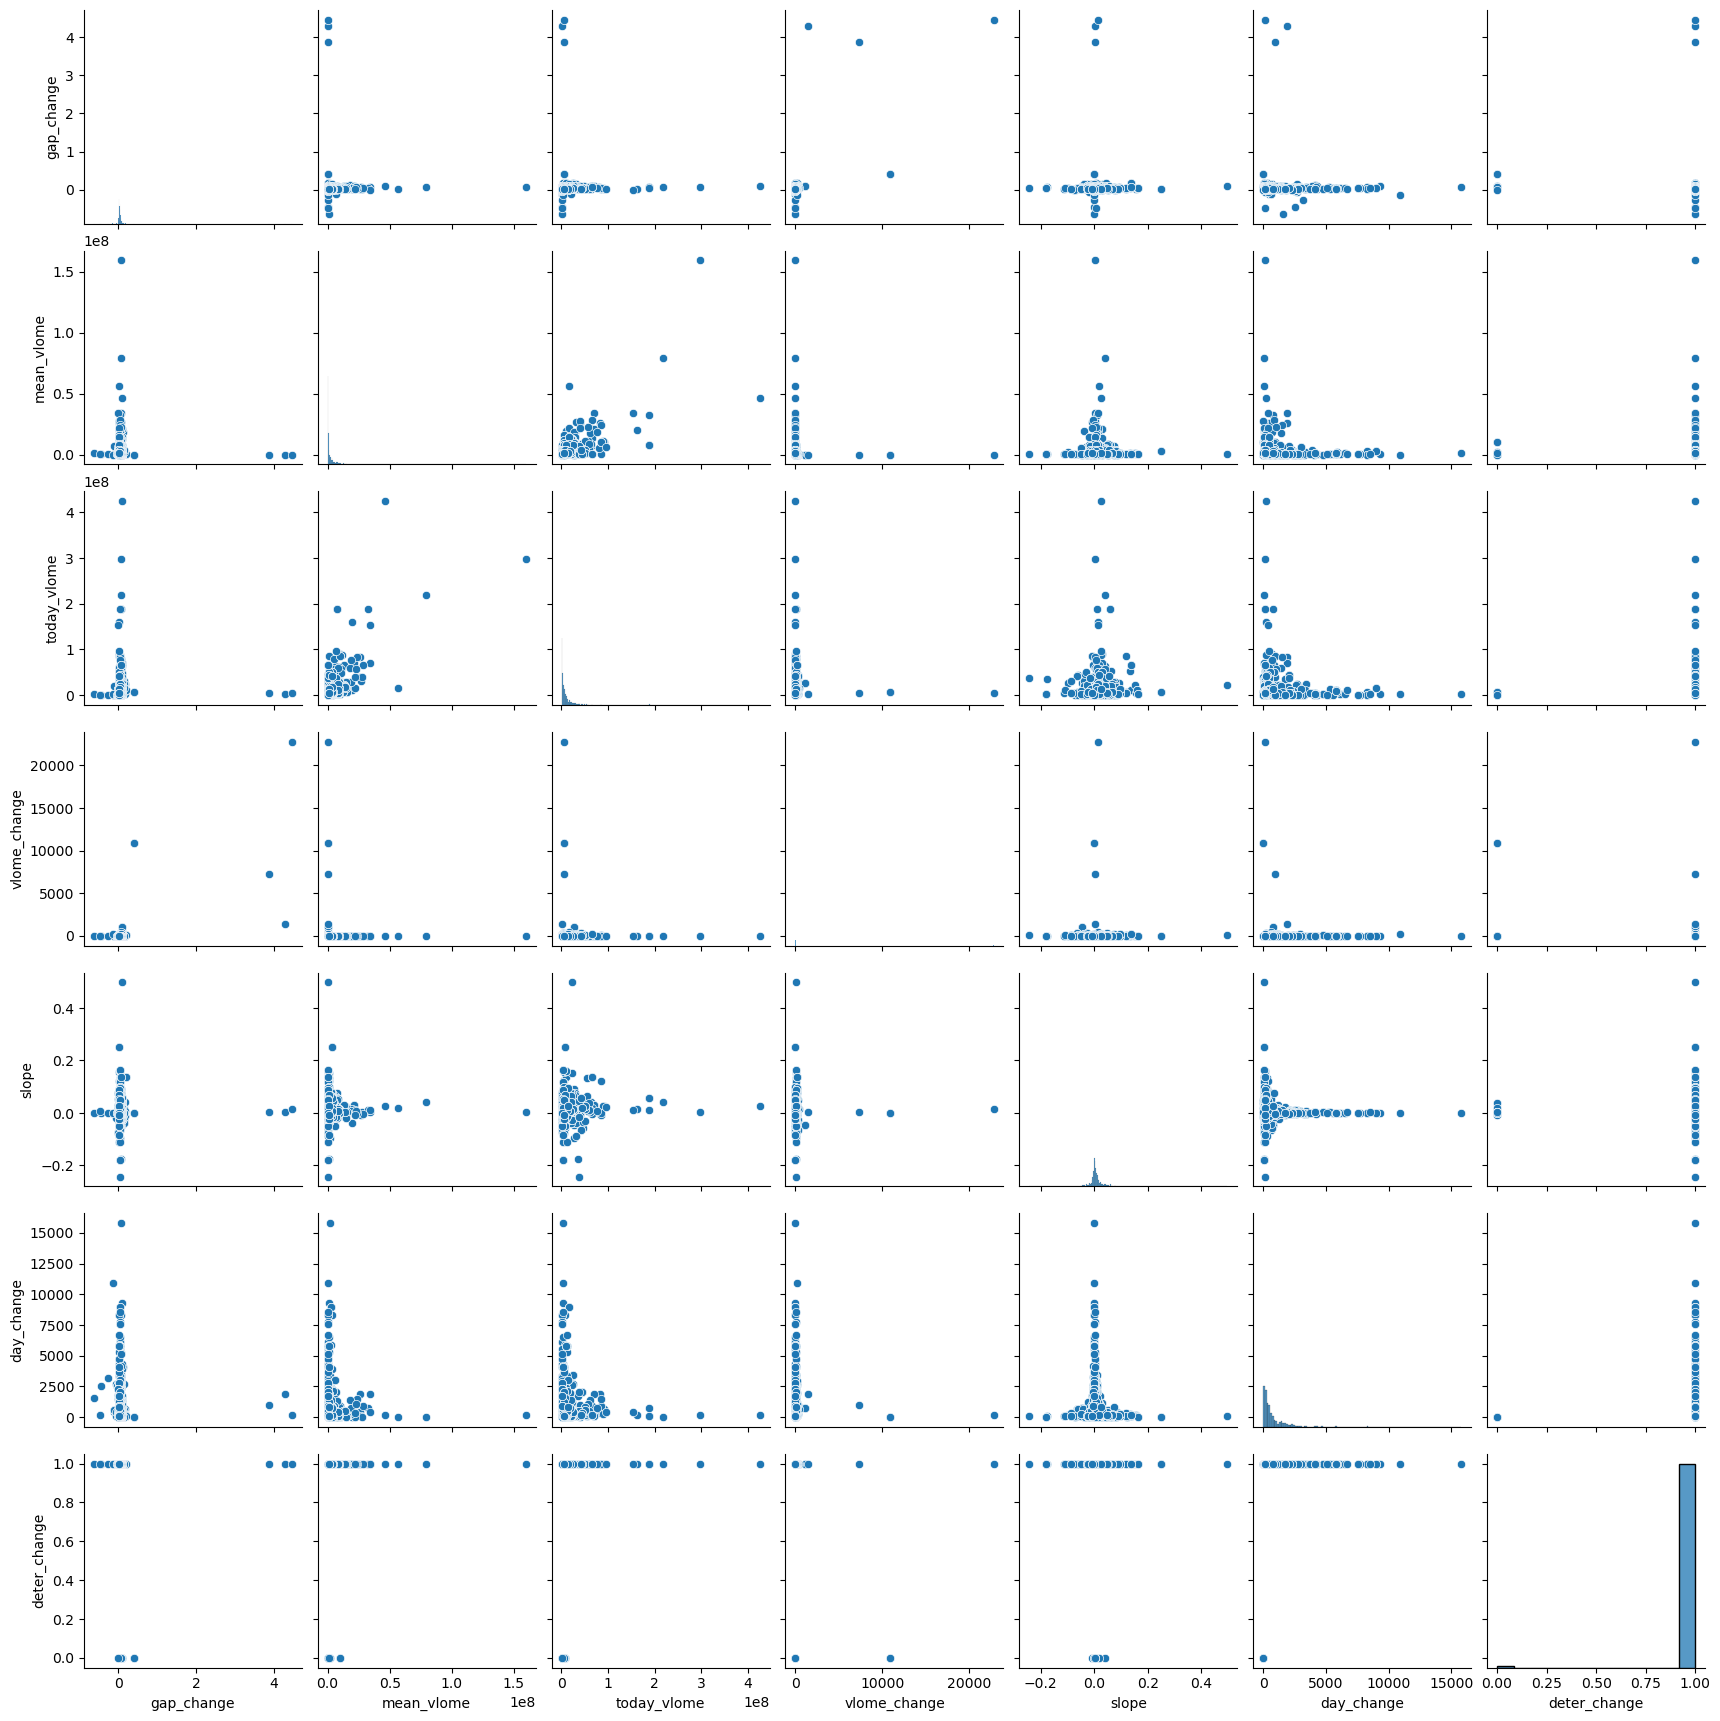

In [40]:
%matplotlib inline
sns.pairplot(stock_data)

In [41]:
Y = stock_data['deter_change']
X = stock_data[['today_vlome','slope','gap_change','vlome_change','mean_vlome']]

X = sm.add_constant(X)
model = sm.Logit(Y,X)
results = model.fit()
print( results.summary())

Optimization terminated successfully.
         Current function value: 0.035352
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:           deter_change   No. Observations:                 1280
Model:                          Logit   Df Residuals:                     1274
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.2262
Time:                        18:40:12   Log-Likelihood:                -45.251
converged:                       True   LL-Null:                       -58.481
Covariance Type:            nonrobust   LLR p-value:                 7.264e-05
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1426      0.481      8.616      0.000       3.200       5.085
today_vlome   3.483e-0